In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wisc_ecephys_tools as wet
from findlay2025a.constants import Files

In [ ]:
nb = wet.get_sglx_project()
rips = pd.read_parquet(Files.RIPPLES)
spws = pd.read_parquet(Files.CLASSIC_SPWS)

In [4]:
p = sns.color_palette("Paired")
for i in np.arange(len(p))[1::2]:
    p[i] = (np.array(p[i]) + np.array(p[i - 1])) / 2
palette = {"Wake": p[2], "NREM": p[0]}
p

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 array([0.38627451, 0.63921569, 0.79803922]),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 array([0.44901961, 0.75098039, 0.35686275]),
 (0.984313725490196, 0.6039215686274509, 0.6),
 array([0.9372549 , 0.35294118, 0.35490196]),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 array([0.99607843, 0.62352941, 0.21764706]),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 array([0.60392157, 0.46862745, 0.72156863]),
 (1.0, 1.0, 0.6),
 array([0.84705882, 0.6745098 , 0.37843137])]

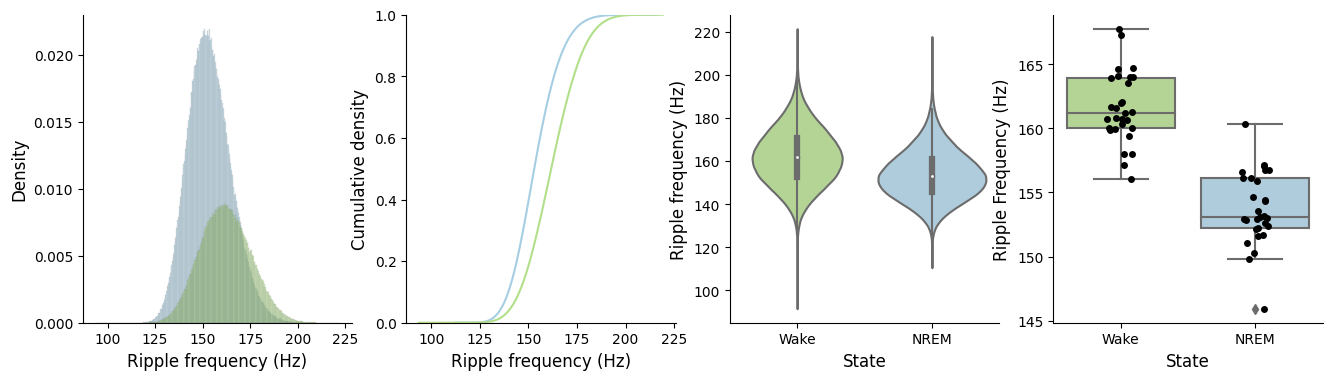

In [25]:
fs = 12
sz = 4
fig, axes = plt.subplots(1, 4, figsize=(4 * sz, sz))
sns.histplot(
    rips,
    x="freq",
    hue="state",
    hue_order=["Wake", "NREM"],
    ax=axes[0],
    stat="density",
    palette=palette,
    legend=False,
)
axes[0].set_xlabel("Ripple frequency (Hz)", fontsize=fs)
axes[0].set_ylabel("Density", fontsize=fs)
sns.ecdfplot(
    rips,
    x="freq",
    hue="state",
    hue_order=["Wake", "NREM"],
    ax=axes[1],
    palette=palette,
    legend=False,
)
axes[1].set_xlabel("Ripple frequency (Hz)", fontsize=fs)
axes[1].set_ylabel("Cumulative density", fontsize=fs)
sns.violinplot(
    rips, x="state", y="freq", order=["Wake", "NREM"], ax=axes[2], palette=palette
)
axes[2].set_xlabel("State", fontsize=fs)
axes[2].set_ylabel("Ripple frequency (Hz)", fontsize=fs)
df = rips.groupby(["subject", "experiment", "state"])["freq"].mean().reset_index()
sns.boxplot(
    data=df,
    x="state",
    y="freq",
    color="w",
    order=["Wake", "NREM"],
    palette=palette,
    ax=axes[3],
)
sns.stripplot(
    data=df, x="state", y="freq", color="k", order=["Wake", "NREM"], ax=axes[3]
)
axes[3].set_xlabel("State", fontsize=fs)
axes[3].set_ylabel("Ripple Frequency (Hz)", fontsize=fs)

for ax in axes:
    ax.spines[["right", "top"]].set_visible(False)

fig.savefig(
    nb.get_project_file("figures/wake_vs_nrem_ripple_frequency.png"),
    bbox_inches="tight",
    dpi=600,
)